In [232]:
import pandas as pd


In [233]:
df=pd.read_csv('Fraud_check.csv')

In [234]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [235]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

we are creating a new variable 'fraud' which will be our dependent variable based on the statement given

In [236]:
df['fraud']=0

In [237]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,0
596,YES,Divorced,69967,55369,2,YES,0
597,NO,Divorced,47334,154058,0,YES,0
598,YES,Married,98592,180083,17,NO,0


In [238]:
risk=df[df['Taxable.Income']<30000].index.values
risk

array([ 10,  12,  16,  19,  21,  28,  34,  36,  38,  48,  53,  55,  58,
        61,  68,  79,  85,  87,  89,  93,  94,  96,  98, 106, 110, 114,
       118, 121, 122, 123, 126, 135, 137, 140, 143, 152, 153, 154, 158,
       163, 168, 171, 172, 179, 181, 182, 188, 194, 196, 199, 204, 205,
       207, 219, 228, 230, 232, 233, 237, 241, 247, 248, 259, 265, 267,
       278, 280, 284, 288, 292, 301, 315, 326, 327, 329, 331, 333, 337,
       338, 339, 346, 347, 349, 352, 354, 356, 357, 362, 363, 367, 379,
       392, 398, 428, 433, 434, 437, 438, 439, 443, 444, 446, 457, 458,
       459, 462, 465, 471, 483, 491, 493, 506, 509, 517, 524, 526, 533,
       540, 541, 544, 557, 567, 575, 591], dtype=int64)

In [239]:
for i in risk:
    df['fraud'].iloc[i]='risky'

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [240]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,0
596,YES,Divorced,69967,55369,2,YES,0
597,NO,Divorced,47334,154058,0,YES,0
598,YES,Married,98592,180083,17,NO,0


In [267]:
df['fraud'].unique()

array(['good', 'risky'], dtype=object)

In [268]:
good=df[df['Taxable.Income']>=30000].index.values

In [269]:
for i in good:
    df['fraud'].iloc[i]='good'

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [270]:
df['fraud'].unique()

array(['good', 'risky'], dtype=object)

In [271]:
df['fraud'].value_counts()

good     476
risky    124
Name: fraud, dtype: int64

<AxesSubplot:ylabel='Frequency'>

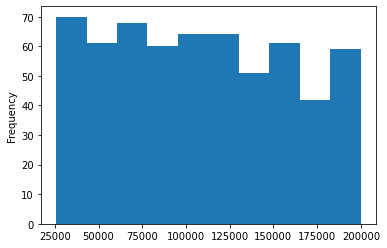

In [272]:
df['City.Population'].plot(kind='hist')

In [273]:
from sklearn.preprocessing import LabelEncoder

In [274]:
le=LabelEncoder()

In [275]:
df['Undergrad']=le.fit_transform(df['Undergrad'])

In [276]:
df['Marital.Status']=le.fit_transform(df['Marital.Status'])

In [277]:
df['Urban']=le.fit_transform(df['Urban'])

In [278]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,0,2,68833,50047,10,1,good
1,1,0,33700,134075,18,1,good
2,0,1,36925,160205,30,1,good
3,1,2,50190,193264,15,1,good
4,0,1,81002,27533,28,0,good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,good
596,1,0,69967,55369,2,1,good
597,0,0,47334,154058,0,1,good
598,1,1,98592,180083,17,0,good


In [279]:
from sklearn.tree import DecisionTreeClassifier

In [280]:
from sklearn.preprocessing import normalize

In [311]:
dt=DecisionTreeClassifier(max_depth=3)

In [312]:
x=df.iloc[:,:-1]
y=df['fraud']
x=normalize(x)

In [313]:
from sklearn.model_selection import train_test_split

In [396]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [397]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [398]:
model=dt.fit(x_train,y_train)

In [399]:
y_pred=model.predict(x_test)
y_pred1=model.predict(x_train)

In [400]:
from sklearn.metrics import classification_report

In [401]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

        good       0.97      0.99      0.98       382
       risky       0.96      0.89      0.92        98

    accuracy                           0.97       480
   macro avg       0.96      0.94      0.95       480
weighted avg       0.97      0.97      0.97       480



In [402]:
+

              precision    recall  f1-score   support

        good       0.88      0.97      0.92        94
       risky       0.81      0.50      0.62        26

    accuracy                           0.87       120
   macro avg       0.84      0.73      0.77       120
weighted avg       0.86      0.87      0.85       120



In [403]:
from sklearn import tree

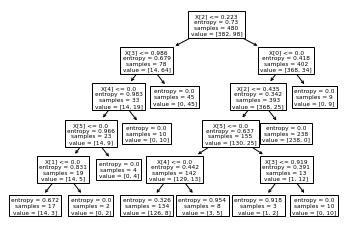

In [404]:
tree.plot_tree(model);